In [ ]:

!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.optimize import curve_fit
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt;
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.preprocessing import normalize
plt.rcdefaults()

In [ ]:

df_uah1 = pd.read_excel("/content/drive/MyDrive/diploma/Data_1_S.xlsx", "quantity")
df_uah1["Total 1"] = df_uah1["T1"] +df_uah1["T2"] +df_uah1["T3"] +df_uah1["T4"]
df_uah1["Total 2"] = df_uah1[[c for c in df_uah1.columns if "P" in c]].sum(axis=1)
df_uah1["Total"] = df_uah1["Total 1"] + df_uah1["Total 2"]
test_size = 0.4
full_test_size = 131 #131
train = df_uah1.iloc[:int(len(df_uah1)*(1-test_size))]
test = df_uah1.iloc[int(len(df_uah1)*(1-test_size)):full_test_size]

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:211: UserWarning: Cell A2 is marked as a date but the serial value 227278601.6 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:211: UserWarning: Cell A3 is marked as a date but the serial value 99929344.48 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
<ipython-input-4-fca1782498b0>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_uah1["Total 2"] = df_uah1[[c for c in df_uah1.columns if "P" in c]].sum(axis=1)


In [ ]:
column_set = [
"customer_pain1",
"customer_pain2",
"customer_pain3",
"customer_pain4",
"customer_pain5",
"customer_pain6",
"Average_price",
"Internet_access_smoothed_predicted", 
"Population_smoothed_predicted",
"GDP_smoothed_predicted", 
"CPI_smoothed_predicted"]
exog = pd.read_csv("/content/drive/MyDrive/diploma/x_projections.csv").set_index("Unnamed: 0")
exog["Average_price"] = exog["Average_price_CPI_adjusted_projected"]*exog["CPI_smoothed_predicted"]
exog = exog[column_set] 

customer_pain4                        0
customer_pain5                        0
Average_price                         0
Internet_access_smoothed_predicted    0
CPI_smoothed_predicted                0
dtype: int64

In [ ]:
seasonalities = ['additive', 'multiplicative']
forier_orders = [4, 5, 6, 12]
growths = ["linear", "logistic", "flat"]

In [ ]:
scores = pd.DataFrame(columns=["seasonality", "growth","variable", 
                               "RMSE_train", "MAPE_train", "RMSE_test", "MAPE_test", "Cross-validation sample"])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/soufdw91.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/l1dhg40u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31779', 'data', 'file=/tmp/tmpbka6ptjm/soufdw91.json', 'init=/tmp/tmpbka6ptjm/l1dhg40u.json', 'output', 'file=/tmp/tmpbka6ptjm/prophet_modeljesg4t9u/prophet_model-20230514231134.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:11:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


52 Total linear additive 0.03433155485954138 0.11422696318736036


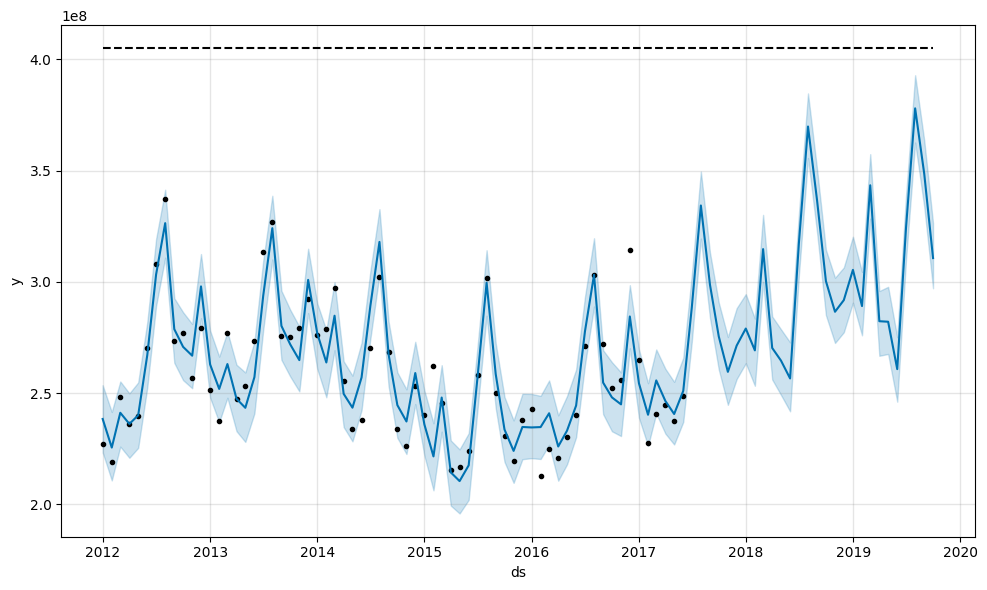

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/4f8ki_vr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/5uy3lohs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85518', 'data', 'file=/tmp/tmpbka6ptjm/4f8ki_vr.json', 'init=/tmp/tmpbka6ptjm/5uy3lohs.json', 'output', 'file=/tmp/tmpbka6ptjm/prophet_model9i4bsun5/prophet_model-20230514231135.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:11:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


53 Total logistic additive 0.03607137379943408 0.14986311607807687


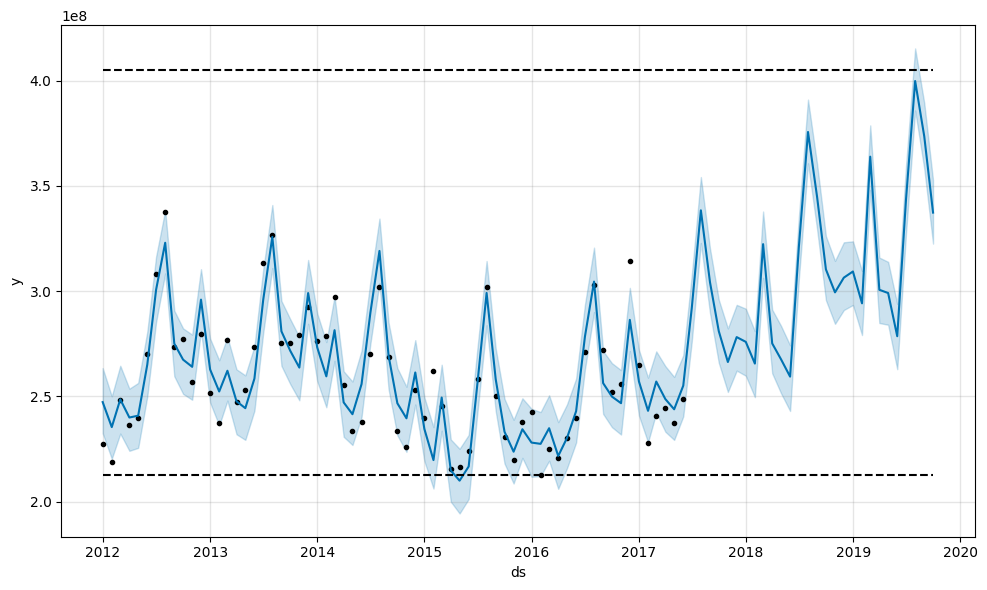

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/q1vbfn2r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/ysscz481.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37415', 'data', 'file=/tmp/tmpbka6ptjm/q1vbfn2r.json', 'init=/tmp/tmpbka6ptjm/ysscz481.json', 'output', 'file=/tmp/tmpbka6ptjm/prophet_model854uxeln/prophet_model-20230514231136.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:11:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


54 Total flat additive 0.03626615557764276 0.15317476965844307


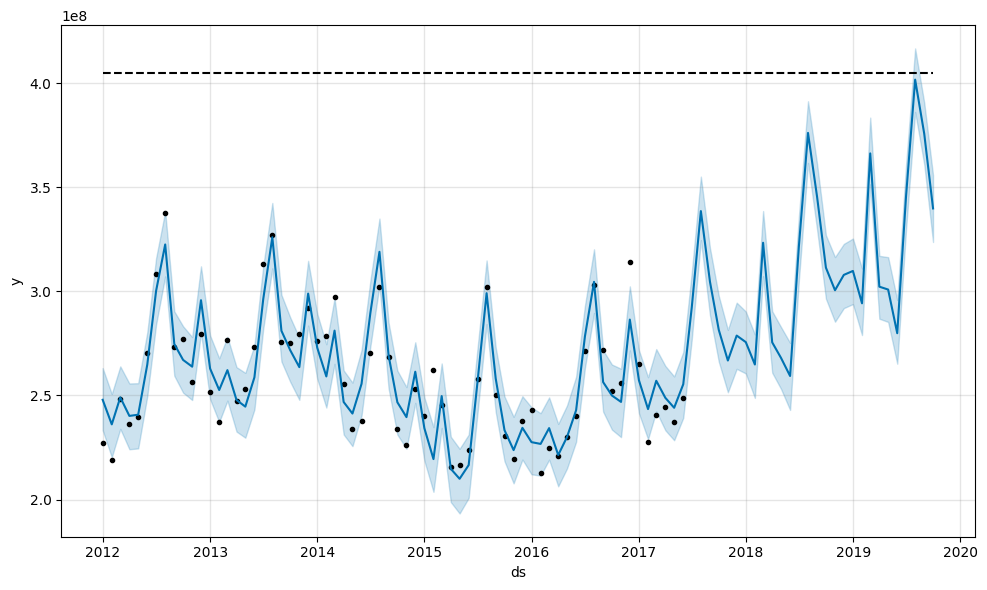

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/5uovf2js.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/mlzyhfe5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47133', 'data', 'file=/tmp/tmpbka6ptjm/5uovf2js.json', 'init=/tmp/tmpbka6ptjm/mlzyhfe5.json', 'output', 'file=/tmp/tmpbka6ptjm/prophet_model6lejr00w/prophet_model-20230514231137.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55 Total linear multiplicative 0.035979723935172944 0.19348641817417647


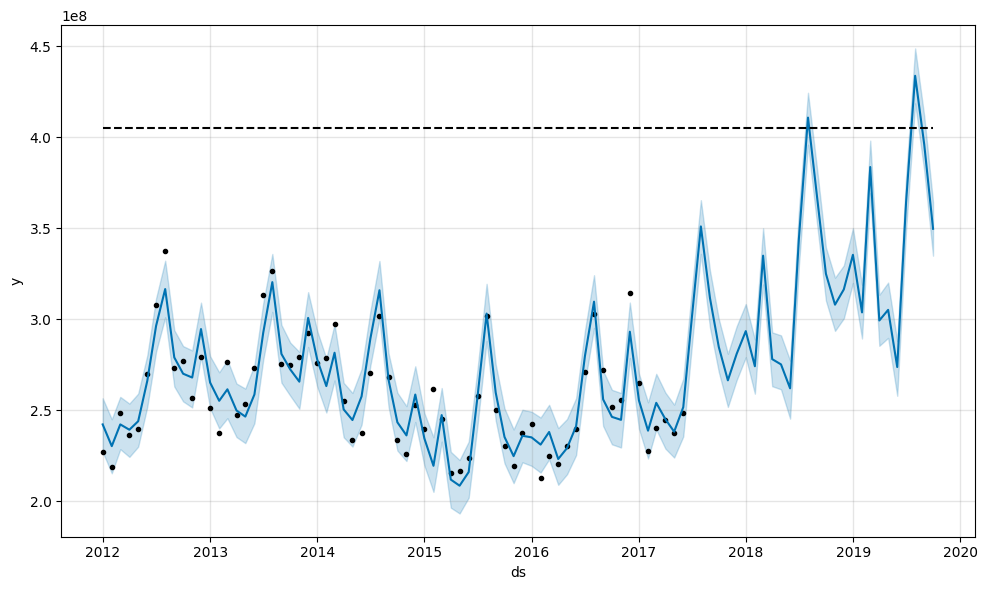

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/baxs8aoj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/fgnjrpxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57324', 'data', 'file=/tmp/tmpbka6ptjm/baxs8aoj.json', 'init=/tmp/tmpbka6ptjm/fgnjrpxb.json', 'output', 'file=/tmp/tmpbka6ptjm/prophet_model4wad7rrx/prophet_model-20230514231138.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:11:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


56 Total logistic multiplicative 0.38301855845786265 0.9441114405865886


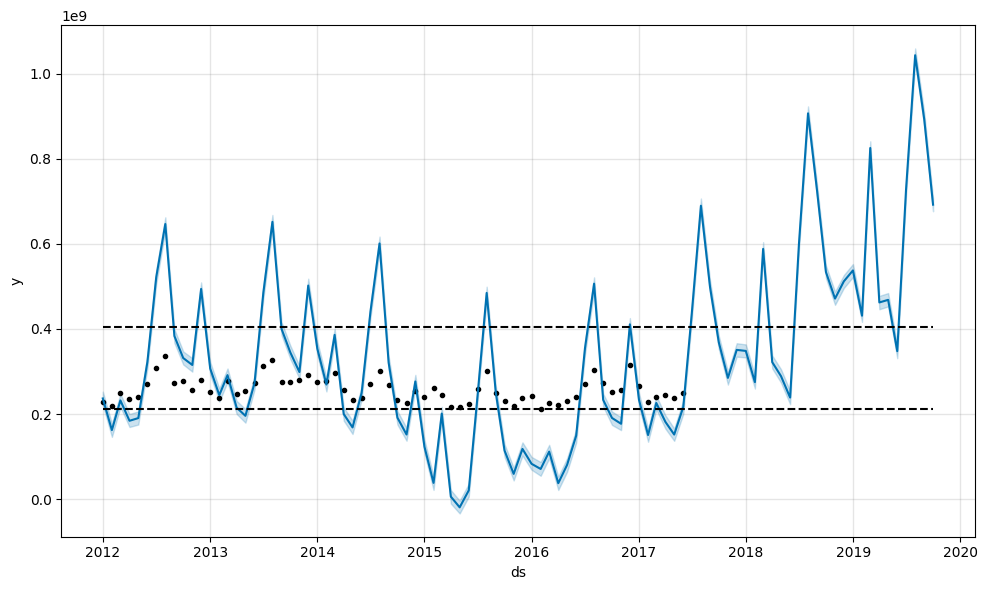

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/wvsx6id_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbka6ptjm/7izzxtlo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30441', 'data', 'file=/tmp/tmpbka6ptjm/wvsx6id_.json', 'init=/tmp/tmpbka6ptjm/7izzxtlo.json', 'output', 'file=/tmp/tmpbka6ptjm/prophet_model5l2q02gr/prophet_model-20230514231139.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:11:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


57 Total flat multiplicative 0.0362655069839381 0.15314767719697558


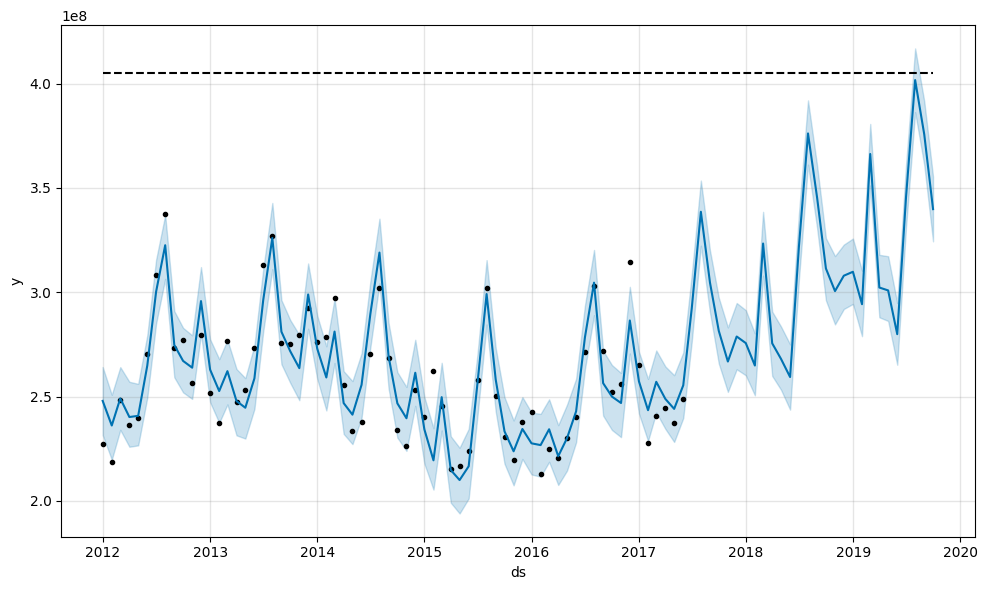

In [ ]:
test_size = 0.5
full_test_size = len(df_uah1)
full_test_size = 94
train = df_uah1.iloc[:int(len(df_uah1)*(1-test_size))]
test = df_uah1.iloc[int(len(df_uah1)*(1-test_size)):full_test_size]



# i = 0
variab = "Total"
for seasonality in seasonalities:
      for growth in growths:
            m = Prophet(seasonality_mode=seasonality,
                  growth=growth,
                  yearly_seasonality=True)
            # m.add_seasonality(name='monthly', period=12, fourier_order=forier_order)
            ptrain = pd.DataFrame()
            ptrain["ds"] = train["Period"]

            

            for  v__ in exog.columns:
              # future[v__] = list(exog[v__][len(test):])
              ptrain[v__] = list(exog[v__][:len(ptrain)])
              m.add_regressor(v__)

            ptrain["y"] = train[variab]

            ptrain['floor'] = ptrain['y'].min()
            ptrain['cap'] = ptrain['y'].max() + (ptrain['y'].max() *0.2)
            m.fit(ptrain)

            
            future = m.make_future_dataframe(periods=len(test), include_history=True, freq="m")
            for  v__ in exog.columns:
              future[v__] = list(exog[v__][:full_test_size])

            future['floor']=ptrain['y'].min()
            future['cap']=ptrain['y'].max() + (ptrain['y'].max() *0.2)

            forecast = m.predict(future)
            # fb_prophet_predictions[f"{v}{variab},FBProphet(seasonal={seasonality},growth={growth})"] = forecast["yhat"]
            mse_train = mse(ptrain["y"], forecast["yhat"].iloc[0:len(ptrain["y"])])
            mse_test = mse(test[variab], forecast["yhat"].iloc[-len(test[variab]):])
            mape_train = mape(ptrain["y"], forecast["yhat"].iloc[0:len(ptrain["y"])])
            mape_test = mape(test[variab], forecast["yhat"].iloc[-len(test[variab]):])

            scores.loc[i, :] = list([seasonality, growth, variab,  mse_train, mape_train, mse_test, mape_test, 1-test_size])
            i+=1
            print(i, variab, growth, seasonality, mape_train, mape_test)

            fig1 = m.plot(forecast)
            plt.show()


In [ ]:
scores

,seasonality,growth,variable,RMSE_train,MAPE_train,RMSE_test,MAPE_test,Cross-validation sample
39,additive,linear,Total,244361726345176.4375,0.046126,5155509254204910.0,0.220818,0.85
40,additive,logistic,Total,293375518381956.375,0.052111,7458440343584998.0,0.26898,0.85
41,additive,flat,Total,286833718487251.625,0.05079,6766501075807203.0,0.245617,0.85
42,multiplicative,linear,Total,237740523161674.28125,0.046722,3580158738112509.0,0.176204,0.85
43,multiplicative,logistic,Total,4904194502712119.0,0.208276,148337336720628832.0,1.424242,0.85
44,multiplicative,flat,Total,286833986558044.125,0.050796,6761966513613163.0,0.245442,0.85
45,additive,linear,Total,245572141576015.59375,0.047434,5687171978893543.0,0.248074,0.9
46,additive,logistic,Total,292110554762094.9375,0.052732,7794432423625888.0,0.286259,0.9
47,additive,flat,Total,287484116142600.375,0.051446,6866994921080267.0,0.264091,0.9
48,multiplicative,linear,Total,248677627986052.0,0.0478,3764554420797796.5,0.176706,0.9


In [ ]:
scores.to_csv("/content/drive/MyDrive/diploma/scores_fb_prophet.csv")
fb_prophet_predictions.to_csv("/content/drive/MyDrive/diploma/predictions_fb_prophet.csv")

In [ ]:
fb_prophet_predictions_regressed

,"df_uah1T1, linearly_regressed, FBProphet(seasonal=additive,fourier_order=4,growth=linear)","df_uah1T2, linearly_regressed, FBProphet(seasonal=additive,fourier_order=4,growth=linear)","df_uah1Total 1, linearly_regressed, FBProphet(seasonal=additive,fourier_order=4,growth=linear)","df_uah1T1, linearly_regressed, FBProphet(seasonal=additive,fourier_order=4,growth=logistic)","df_uah1T2, linearly_regressed, FBProphet(seasonal=additive,fourier_order=4,growth=logistic)","df_uah1Total 1, linearly_regressed, FBProphet(seasonal=additive,fourier_order=4,growth=logistic)","df_uah1T1, linearly_regressed, FBProphet(seasonal=additive,fourier_order=4,growth=flat)","df_uah1T2, linearly_regressed, FBProphet(seasonal=additive,fourier_order=4,growth=flat)","df_uah1Total 1, linearly_regressed, FBProphet(seasonal=additive,fourier_order=4,growth=flat)","df_uah1T1, linearly_regressed, FBProphet(seasonal=additive,fourier_order=5,growth=linear)",...,"df_uah1Total 1, linearly_regressed, FBProphet(seasonal=multiplicative,fourier_order=6,growth=linear)","df_uah1T1, linearly_regressed, FBProphet(seasonal=multiplicative,fourier_order=6,growth=flat)","df_uah1T2, linearly_regressed, FBProphet(seasonal=multiplicative,fourier_order=6,growth=flat)","df_uah1Total 1, linearly_regressed, FBProphet(seasonal=multiplicative,fourier_order=6,growth=flat)","df_uah1T1, linearly_regressed, FBProphet(seasonal=multiplicative,fourier_order=12,growth=linear)","df_uah1T2, linearly_regressed, FBProphet(seasonal=multiplicative,fourier_order=12,growth=linear)","df_uah1Total 1, linearly_regressed, FBProphet(seasonal=multiplicative,fourier_order=12,growth=linear)","df_uah1T1, linearly_regressed, FBProphet(seasonal=multiplicative,fourier_order=12,growth=flat)","df_uah1T2, linearly_regressed, FBProphet(seasonal=multiplicative,fourier_order=12,growth=flat)","df_uah1Total 1, linearly_regressed, FBProphet(seasonal=multiplicative,fourier_order=12,growth=flat)"
0,3.141938e+07,2.559985e+06,2.083618e+08,3.369664e+07,2.468369e+06,2.093311e+08,3.441882e+07,2.455136e+06,2.068635e+08,3.141938e+07,...,2.074688e+08,3.441937e+07,2.455140e+06,2.068459e+08,3.227954e+07,2.547950e+06,2.074688e+08,3.441937e+07,2.455140e+06,2.068459e+08
1,3.643682e+07,2.589054e+06,2.145620e+08,3.856368e+07,2.498063e+06,2.155813e+08,3.935456e+07,2.483835e+06,2.129324e+08,3.643682e+07,...,2.142025e+08,3.935425e+07,2.483855e+06,2.129269e+08,3.684036e+07,2.577680e+06,2.142025e+08,3.935425e+07,2.483855e+06,2.129269e+08
2,2.973771e+07,2.428176e+06,1.813111e+08,3.058149e+07,2.429350e+06,1.821926e+08,3.156392e+07,2.412912e+06,1.789469e+08,2.973771e+07,...,1.804462e+08,3.156404e+07,2.412877e+06,1.789962e+08,3.025345e+07,2.411771e+06,1.804462e+08,3.156404e+07,2.412877e+06,1.789962e+08
3,2.946158e+07,2.440348e+06,1.658207e+08,3.051845e+07,2.421700e+06,1.668752e+08,3.151147e+07,2.404377e+06,1.636118e+08,2.946158e+07,...,1.648153e+08,3.151177e+07,2.404358e+06,1.636224e+08,3.001114e+07,2.429437e+06,1.648153e+08,3.151177e+07,2.404358e+06,1.636224e+08
4,2.783101e+07,2.287218e+06,1.573918e+08,2.901206e+07,2.258926e+06,1.585381e+08,2.990244e+07,2.242408e+06,1.555131e+08,2.783101e+07,...,1.556584e+08,2.990296e+07,2.242415e+06,1.554786e+08,2.879418e+07,2.276311e+06,1.556584e+08,2.990296e+07,2.242415e+06,1.554786e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,6.859368e+07,3.370173e+06,3.769290e+08,6.865182e+07,3.604475e+06,3.773983e+08,6.507876e+07,3.605203e+06,3.795915e+08,6.859368e+07,...,3.716235e+08,6.507378e+07,3.605401e+06,3.795911e+08,6.579214e+07,3.425362e+06,3.716235e+08,6.507378e+07,3.605401e+06,3.795911e+08
62,5.422088e+07,2.837347e+06,2.752192e+08,4.906820e+07,3.332597e+06,2.736325e+08,4.669101e+07,3.368557e+06,2.793661e+08,5.422088e+07,...,2.756094e+08,4.669064e+07,3.368491e+06,2.794632e+08,4.788602e+07,2.950376e+06,2.756094e+08,4.669064e+07,3.368491e+06,2.794632e+08
63,5.883051e+07,3.184687e+06,3.065550e+08,5.437762e+07,3.628169e+06,3.055836e+08,5.216197e+07,3.657543e+06,3.10317